### Deep Learning - Project 21
#### Week 1:
This week we want to implement the first steps of the project. We want to understand and visualize the data and get acquainted with the TIF file. We want to try to use the U-net model on the small dataset that the professor gave (all images have a corresponding mask - fully supervised).

In [ ]:
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt

##### Step 1:
The images are TIF files with 32 bit depth and dimension 768x768. The TIF file does not compress the data, so it is lossless. The TIF file can be a 3D stack (a volume) but that is not the case. The following code allows to view the image from the TIF file and now some of its characteristics.

In [ ]:
# Choose what file to upload
from google.colab import files
uploaded = files.upload()

Saving image_v2_mask_04.tif to image_v2_mask_04.tif


Image dtype: float32
Min intensity: -0.0001520467
Max intensity: 0.0003527674
Mean intensity: 0.00013532085


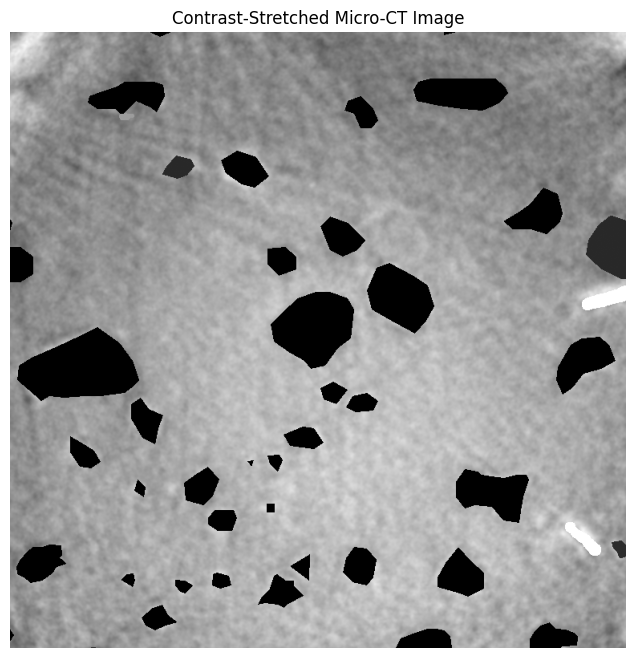

In [ ]:
# Get filename
filename = list(uploaded.keys())[0]

# Load image
img = tiff.imread(filename)

# Print intensity stats
print("Image dtype:", img.dtype)
print("Min intensity:", np.min(img))
print("Max intensity:", np.max(img))
print("Mean intensity:", np.mean(img))

# Stretch contrast manually
img_stretched = (img - np.min(img)) / (np.max(img) - np.min(img)) * 255
img_stretched = img_stretched.astype(np.uint8)

# Show image
plt.figure(figsize=(8, 8))
plt.imshow(img_stretched, cmap='gray')
plt.title("Contrast-Stretched Micro-CT Image")
plt.axis('off')
plt.show()

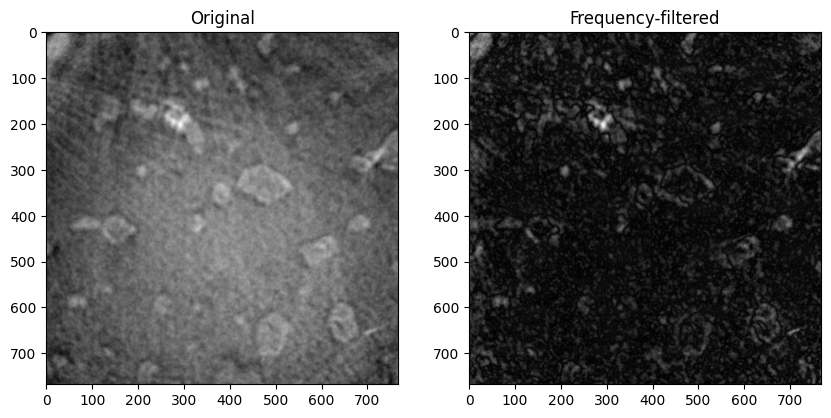

In [ ]:
# --- 2. Normalize image (optional, helps visualization) ---
img_norm = (img_stretched - np.min(img_stretched)) / (np.max(img_stretched) - np.min(img_stretched))

# --- 3. FFT 2D ---
fft_img = np.fft.fft2(img_norm)
fft_shift = np.fft.fftshift(fft_img)  # move zero frequency to center

# --- 4. Create frequency mask ---
# Here, we suppress high-magnitude peaks along vertical stripe direction
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

mask = np.ones_like(fft_shift)

# Example: remove narrow vertical stripe frequencies
stripe_width = 2  # pixels
mask[:, ccol-stripe_width:ccol+stripe_width] = 0  # block vertical frequencies

# --- 5. Apply mask ---
fft_filtered = fft_shift * mask

# --- 6. Inverse FFT ---
ifft_shift = np.fft.ifftshift(fft_filtered)
img_filtered = np.fft.ifft2(ifft_shift)
img_filtered = np.abs(img_filtered)  # magnitude

# --- 7. Rescale to [0,1] for visualization ---
img_filtered = (img_filtered - np.min(img_filtered)) / (np.max(img_filtered) - np.min(img_filtered))

# --- 8. Plot results ---
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_norm, cmap='gray')
axes[0].set_title("Original")
axes[1].imshow(img_filtered, cmap='gray')
axes[1].set_title("Frequency-filtered")
plt.show()